# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

Who:

My audience could be Healthcare policymakers, or Insurance companies, or Employers & HR professionals, or Researchers & analysts,  business managers interested in understanding insights into the trends and patterns of employer-sponsored health insurance (ESI) coverage among private-sector workers in the United States.


What:

I could highlight trends in employer-sponsored health insurance over time and
show differences in coverage across demographics (e.g., gender, race, education level). As well as, identify patterns in how economic shifts or policy changes affect coverage rates.


How:

I can use line charts to show trends over time, bar charts to compare coverage across different demographics, heatmaps to show geographical variations in coverage, annotated points to highlight major policy changes or economic events affecting coverage, and pie chart to show the distribution or composition of a variables at a glance.


# 3. Homework - work with your own data

In [30]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

In [31]:
df = pd.read_csv("/content/dataset_phishing.csv")
df.head(10)

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate
5,http://appleid.apple.com-app.es/,32,24,0,3,1,0,0,0,0,...,1,1,1,0,-1,0,0,1,0,phishing
6,http://www.mutuo.it,19,12,0,2,0,0,0,0,0,...,0,1,0,170,7529,0,0,0,1,legitimate
7,http://www.shadetreetechnology.com/V4/validati...,81,27,1,2,0,0,0,0,0,...,1,0,0,76,5767,0,0,1,2,phishing
8,http://vamoaestudiarmedicina.blogspot.com/,42,34,0,2,0,0,0,0,0,...,1,1,0,371,7298,0,0,0,5,legitimate
9,https://parade.com/425836/joshwigler/the-amazi...,104,10,0,1,10,0,0,0,0,...,1,0,0,128,9368,6774,0,0,5,legitimate


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [33]:
df.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,...,0.124759,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,...,0.330460,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,33.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,84.000000,972.250000,0.000000e+00,0.000000,0.000000,1.000000
50%,47.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,242.000000,3993.000000,1.651000e+03,0.000000,1.000000,3.000000
75%,71.000000,24.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,1.000000,0.000000,449.000000,7026.750000,3.738455e+05,0.000000,1.000000,5.000000
max,1641.000000,214.000000,1.000000,24.000000,43.000000,4.000000,3.000000,19.000000,0.0,19.000000,...,1.000000,1.000000,1.000000,1.000000,29829.000000,12874.000000,1.076799e+07,1.000000,1.000000,10.000000


In [34]:
df.duplicated().sum()

0

In [35]:
numerical_features_df = df.select_dtypes(include=np.number)

In [36]:
numerical_features_df.mean()

,0
length_url,61.126684
length_hostname,21.090289
ip,0.150569
nb_dots,2.480752
nb_hyphens,0.997550
...,...
domain_age,4062.543745
web_traffic,856756.643307
dns_record,0.020122
google_index,0.533946


In [37]:
numerical_features_df.median()

,0
length_url,47.0
length_hostname,19.0
ip,0.0
nb_dots,2.0
nb_hyphens,0.0
...,...
domain_age,3993.0
web_traffic,1651.0
dns_record,0.0
google_index,1.0


In [38]:
numerical_features_df.mode().iloc[0]

,0
length_url,26.0
length_hostname,16.0
ip,0.0
nb_dots,2.0
nb_hyphens,0.0
...,...
domain_age,-1.0
web_traffic,0.0
dns_record,0.0
google_index,1.0


In [39]:
numerical_features_df.isnull().sum()

,0
length_url,0
length_hostname,0
ip,0
nb_dots,0
nb_hyphens,0
...,...
domain_age,0
web_traffic,0
dns_record,0
google_index,0


In [40]:
Q1 = numerical_features_df.quantile(0.25)
Q3 = numerical_features_df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((numerical_features_df < (Q1 - 1.5 * IQR)) | (numerical_features_df > (Q3 + 1.5 * IQR)))
print(outliers.sum())

length_url          620
length_hostname     775
ip                 1721
nb_dots             567
nb_hyphens         1371
                   ... 
domain_age            0
web_traffic        2138
dns_record          230
google_index          0
page_rank             0
Length: 87, dtype: int64


In [46]:
df['status'].value_counts()

,count
status,
1.0,5715


In [41]:
df['status'].value_counts(normalize=True) * 100  # Shows class distribution in percentage

,proportion
status,
legitimate,50.0
phishing,50.0


In [49]:
class_counts = df['status'].value_counts()
imbalance_ratio = class_counts.max() / class_counts.min()
print(f'Imbalance Ratio: {imbalance_ratio:.2f}')


Imbalance Ratio: 1.00


Conclusion:

Data Quality & Usability:

This Phishing dataset has no duplicate rows, so all entries are unique.
There are no missing values, meaning the dataset is complete.
Some features have outliers, which might need further investigation to decide if they should be removed or handled differently.

Statistical Summary:

I calculated the mean, median, and mode. It is helping to understand the central tendencies of numerical features.
There are some inconsistencies in numerical features, which is known as an outliers.

Class Imbalance:

The status column (target variable) has an imbalance ratio of 1.00. It means both classes are equally distributed.
There is no significant class imbalance.

# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

In [44]:
import matplotlib.pyplot as plt

<ipython-input-50-02967adf730d>:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  feature_counts = df_filtered.groupby("status").apply(lambda x: x[features].apply(pd.Series.value_counts)).fillna(0)


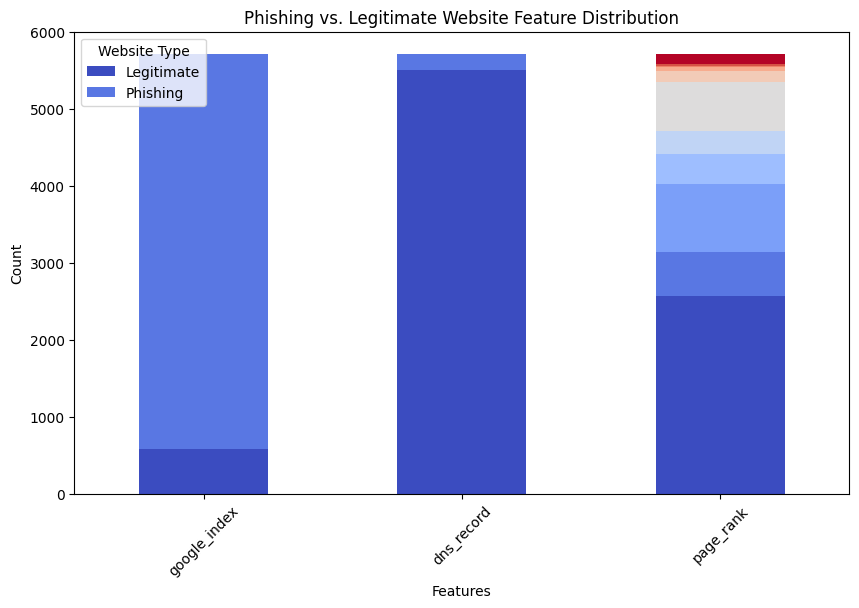

In [50]:

# Select features for analysis
features = ["google_index", "dns_record", "page_rank"]  # Example categorical features
df_filtered = df[features + ["status"]]

# Count phishing vs. legitimate occurrences for each feature
feature_counts = df_filtered.groupby("status").apply(lambda x: x[features].apply(pd.Series.value_counts)).fillna(0)

# Plot stacked bar chart
ax = feature_counts.T.plot(kind='bar', stacked=True, figsize=(10, 6), colormap="coolwarm")
plt.title("Phishing vs. Legitimate Website Feature Distribution")
plt.ylabel("Count")
plt.xlabel("Features")
plt.legend(title="Website Type", labels=["Legitimate", "Phishing"])
plt.xticks(rotation=45)
plt.show()

I looked at the book's introduction page to explore different types of graphs. While I was familiar with some, I didn't know how to draw few of them in Python until today. I learned how to create a bar chart and understand the distribution or composition of a variables at a glance. To ensure my understanding, I searched for help on ChatGPT and Google. I then made some adjustments to the inputs to verify my grasp of the concept.